In [7]:
from Interval import *

In [11]:
obj = DataSeparator('all', '/devchau.csv')
df = obj.get_df()
df.dropna(subset=['NextInt'], inplace=True)
df = df[df.NextInt < 14]
np.mean(df.NextInt)

5.326086956521739

<AxesSubplot:xlabel='NextInt', ylabel='Density'>

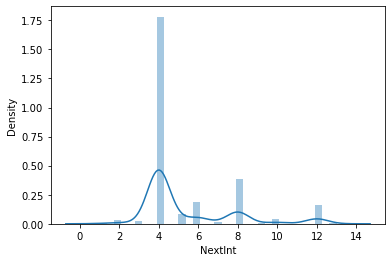

In [12]:
import seaborn as sns

sns.distplot(df.NextInt)

In [13]:
df.NextInt.value_counts()

4.0     834
8.0     182
6.0      88
12.0     77
5.0      41
10.0     21
2.0      14
3.0      11
7.0       9
1.0       4
9.0       4
13.0      2
11.0      1
Name: NextInt, dtype: int64

In [17]:
import pandas as pd

df = pd.read_csv('/Users/charlesoneill/DataspellProjects/charliemacuject/pharma_reports/data/DME/ericmayer.csv')
df.NextInt.unique()

array([nan, '3', '4', '6', '1', '0', '12', '2', '8', '10', '7', '5', '14',
       '46', '17', '11', '16', '9', '3.5', '18', '56', '68', '23', '67',
       '89', '45', '26', '13', '?'], dtype=object)

In [18]:
len(df)

2143

In [19]:
df = df[df.NextInt != '?']

In [20]:
len(df)

2142

In [21]:
df.to_csv('/Users/charlesoneill/DataspellProjects/charliemacuject/pharma_reports/data/DME/ericmayer.csv')

In [22]:
df = pd.read_csv('/Users/charlesoneill/DataspellProjects/charliemacuject/pharma_reports/data/DME/ericmayer.csv')
len(df)

2142

In [19]:
from Utilisation import *

obj = DataSeparator('all', '/ericmayer.csv')
pdf_list = obj.patient_dataframes()

In [14]:
def avgf_steroids(pdf_list, num_visits, drug_name):
    avgf_list = ['Lucentis', 'Avastin', 'Eylea']
    steroid_list = ['Ozurdex', 'Triesence', 'Kenalog', 'Kenacort', 'IVTA']
    drugs_list = []
    for pdf in pdf_list:
        count = 0
        if len(pdf) > num_visits:
            for i in range(len(pdf)):
                while count < num_visits:
                    drug = pdf['Drug'].iloc[i]
                    if drug in avgf_list:
                        drugs_list.append('Anti-VEGF')
                    if drug in steroid_list:
                        drugs_list.append('Steroid')
                    count += 1
                    i += 1
    count_drug = drugs_list.count(drug_name)
    return count_drug

In [15]:
def all_vgf_steroid(pdf_list, visit_num, drug_name):
    counts = []
    for i in range(1, visit_num+1):
        average_drug = avgf_steroids(pdf_list, i, drug_name)
        counts.append(average_drug)
    return counts

In [16]:
def plot_avgf_steroid(pdf_list):
    w, y = all_vgf_steroid(pdf_list, 100, 'Anti-VEGF'), all_vgf_steroid(pdf_list, 100, 'Steroid')
    matplotlib.rcParams['font.size'] = 18
    x = list(range(1, 101))
    fig = plt.figure(figsize=(12, 7))
    ax = plt.axes()
    ax.set(xlabel='Visit Number', ylabel='Number of Injections Using Drug')
    ax.plot(x, w, label='Anti-VEGF', color='orange')
    ax.plot(x, y, label='Steroid', color='#187bcd')
    ax.legend(loc='lower left')
    right_side = ax.spines["right"]
    left_side = ax.spines['left']
    top_side = ax.spines['top']
    right_side.set_visible(False)
    left_side.set_visible(False)
    top_side.set_visible(False)
    plt.savefig('ut_plot.png', dpi=300, bbox_inches='tight')

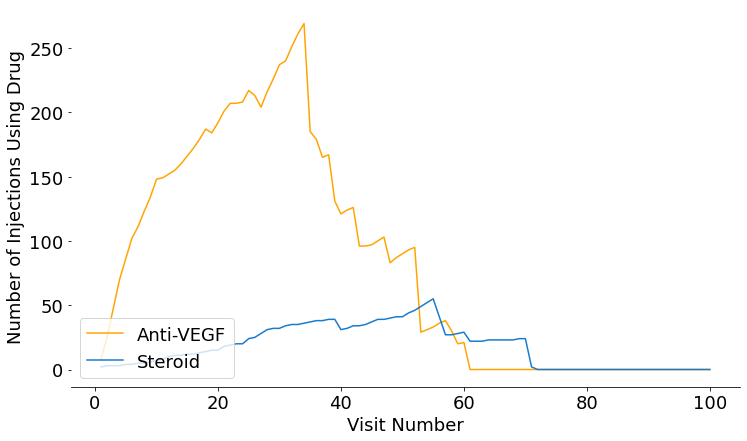

In [20]:
plot_avgf_steroid(pdf_list)